In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

chocolate_df = pd.read_csv('flavors_of_cacao.csv')

In [4]:
chocolate_df.columns = ['Company (if known)',
 'Bar Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Company Location',
 'Rating',
 'Bean Type',
 'Bean Origin']

In [5]:
chocolate_df

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


In [6]:
chocolate_df['Cocoa Percent'] = chocolate_df['Cocoa Percent'].apply(lambda x: float(x.strip('%')) / 100.0)
chocolate_df.head(3)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo


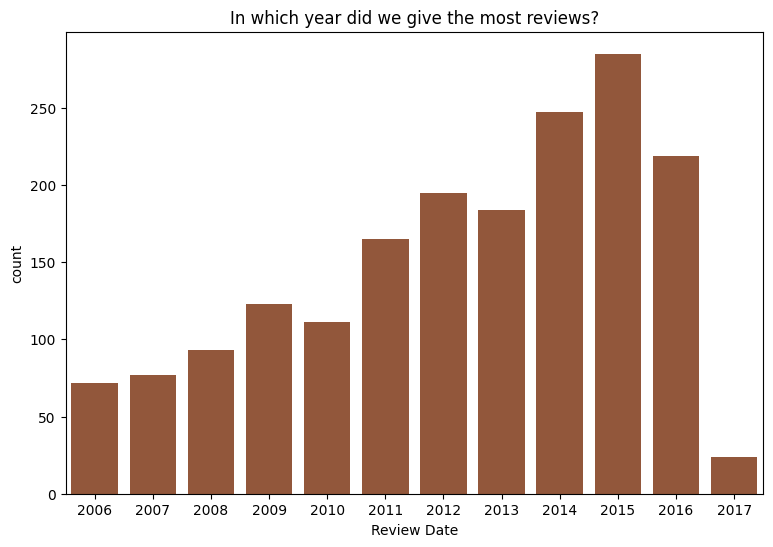

In [62]:
plt.figure(figsize = (9, 6))
sns.countplot(data = chocolate_df, x = 'Review Date', color = 'sienna' )
plt.title('In which year did we give the most reviews?')
plt.savefig('count-year.jpg')

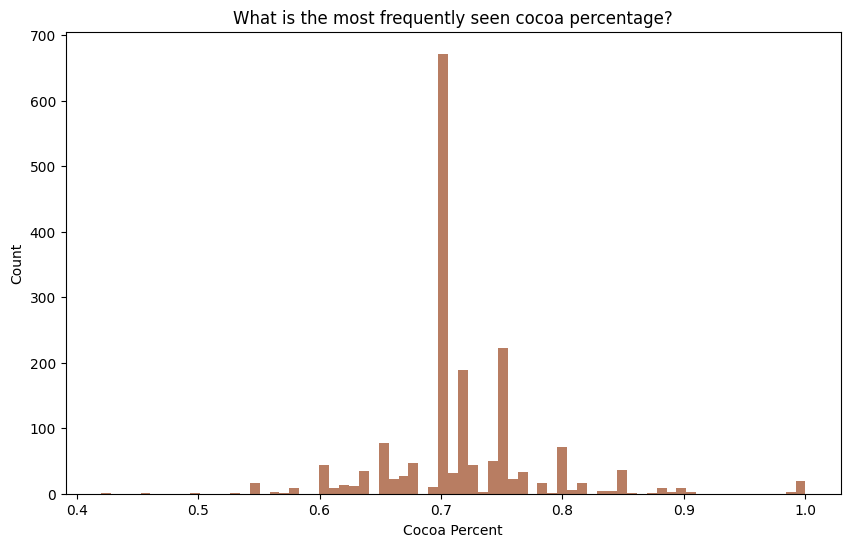

In [70]:
plt.figure(figsize = (10, 6))
sns.histplot(data = chocolate_df, x = 'Cocoa Percent', color = 'sienna',edgecolor=None, linewidth=0)
plt.title('What is the most frequently seen cocoa percentage?')
plt.savefig('Cocoa Percent.jpg')

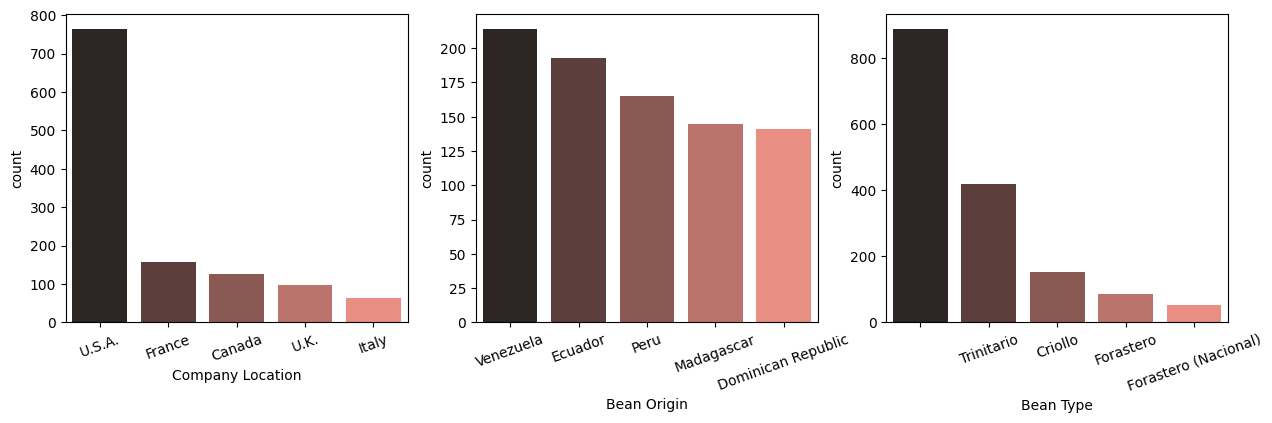

In [69]:
fig, axs = plt.subplots(ncols=3)
fig.set_figheight(4)
fig.set_figwidth(15)

df_categorical = chocolate_df[['Company Location', 'Bean Origin', 'Bean Type']]
n = 0
for col in df_categorical.columns:
    sns.countplot(data = df_categorical, x = col, palette = 'dark:salmon',
                  order = df_categorical[col].value_counts().iloc[:5].index, ax=axs[n])
    axs[n].tick_params(axis='x', labelrotation=20)
    n = n+1

plt.savefig('loc&type.jpg',bbox_inches = 'tight')

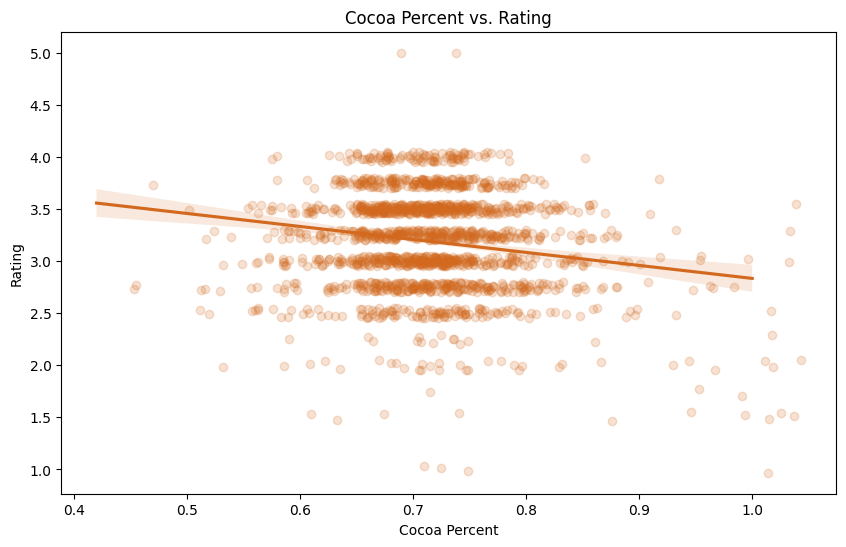

In [65]:
plt.figure(figsize = (10, 6))
sns.regplot(data = chocolate_df, x = 'Cocoa Percent', y = 'Rating', 
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 0.2}, color = 'chocolate')
plt.title('Cocoa Percent vs. Rating')
plt.savefig('Cocoa Percent vs. Rating.jpg')

There's a slight negative correlation between Cocoa Percent and Rating